<a href="https://colab.research.google.com/github/abhirajbhattashali/Heart_Fail_Prediction/blob/main/HF_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils import to_categorical

In [4]:
#Reading and splitting data into training and testing subsets
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
print(data.info())

print(Counter(data['DEATH_EVENT']))

y = data['DEATH_EVENT']
x = data.drop('DEATH_EVENT',axis=1)

x = pd.get_dummies(x)

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
Counter({0: 2

In [5]:
#FEATURE SCALING
ct = ColumnTransformer([("numeric",StandardScaler(),['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [6]:
#LABEL ENCODING
le = LabelEncoder()
Y_train = le.fit_transform(Y_train.astype(str))
Y_test = le.transform(Y_test.astype(str))

In [12]:

#  MODEL ARCHITECTURE
model = Sequential()
#Input Layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))

#Hidden Layer
model.add(Dense(24,activation="relu"))

#Output Layer
model.add(Dense(2,activation="softmax"))




In [14]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
#SUMMARY
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                192       
                                                                 
 dense_7 (Dense)             (None, 2)                 50        
                                                                 
Total params: 242 (968.00 Byte)
Trainable params: 242 (968.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
#Training the model
model.fit(X_train,Y_train,epochs=100,batch_size=24,verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 0.7686 - accuracy: 0.5024
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.5646
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6316
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6603
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6842
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.6938
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7033
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7081
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7368
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7560
Epoch 11/100
9/9 [===========

In [17]:
#Evaluating the model
loss,acc = model.evaluate(X_test,Y_test,verbose=0)
print("Loss", loss, "Accuracy:", acc)

Loss 0.4273369312286377 Accuracy: 0.8444444537162781


In [18]:
y_estimate = model.predict(X_test,verbose=0)
y_estimate = np.argmax(y_estimate, axis=1)
y_true = Y_test

#Classification Report
print(classification_report(y_true,y_estimate))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89        62
           1       0.85      0.61      0.71        28

    accuracy                           0.84        90
   macro avg       0.85      0.78      0.80        90
weighted avg       0.85      0.84      0.84        90



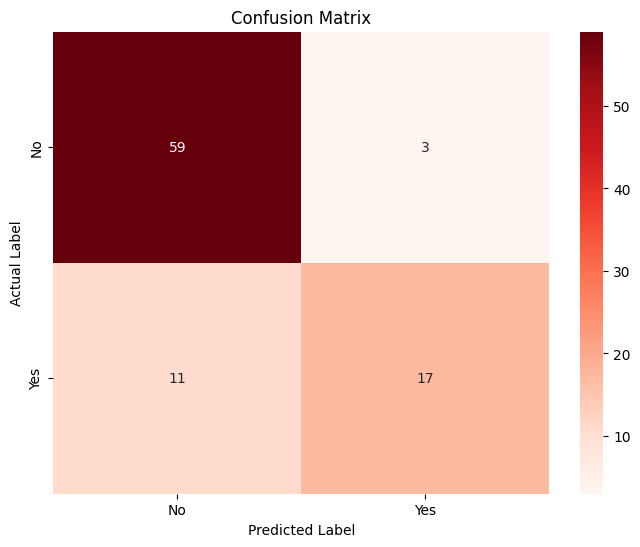

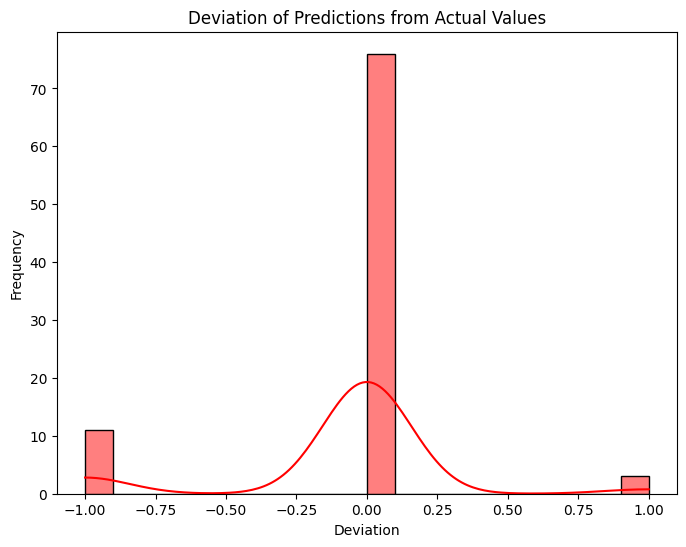

Accuracy of the model: 0.8444444537162781

Model Performance Explanation:
The confusion matrix shows how many predictions were correct and incorrect for each label.
For example, the top-left cell shows the number of true negatives (correctly predicted 'No').
The bottom-right cell shows the number of true positives (correctly predicted 'Yes').
The other cells show the number of false positives and false negatives.

The deviation graph shows the difference between the predicted and actual values.
A large deviation means that the prediction was far from the actual value.
A small deviation means that the prediction was close to the actual value.

The accuracy of the model shows the overall percentage of correct predictions.


In [25]:


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_true, y_estimate)


labels = ['No', 'Yes']

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


deviation = y_estimate - y_true

# Histogram to visualize the deviation
plt.figure(figsize=(8, 6))
sns.histplot(deviation, bins=20, kde=True, color='red')
plt.title('Deviation of Predictions from Actual Values')
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.show()

# Accuracy
print(f"Accuracy of the model: {acc}")


#INFO
print("\nModel Performance Explanation:")
print("The confusion matrix shows how many predictions were correct and incorrect for each label.")
print("For example, the top-left cell shows the number of true negatives (correctly predicted 'No').")
print("The bottom-right cell shows the number of true positives (correctly predicted 'Yes').")
print("The other cells show the number of false positives and false negatives.")
print("\nThe deviation graph shows the difference between the predicted and actual values.")
print("A large deviation means that the prediction was far from the actual value.")
print("A small deviation means that the prediction was close to the actual value.")
print("\nThe accuracy of the model shows the overall percentage of correct predictions.")
